Reference: [OpenCV Course - freecodecamp](https://www.youtube.com/watch?v=oXlwWbU8l2o)

In [ ]:
# ! pip install caer # instructor's library to speed up

# Library

In [16]:
import cv2 as cv
import numpy as np

# Read Image

In [4]:
img = cv.imread('car.jpg')
img

array([[[ 19,  34,  30],
        [  3,  18,  14],
        [  0,  16,   9],
        ...,
        [ 40,  46,  41],
        [ 38,  45,  40],
        [ 41,  48,  43]],

       [[ 36,  53,  49],
        [ 10,  28,  21],
        [  0,  15,   8],
        ...,
        [ 38,  44,  39],
        [ 36,  42,  37],
        [ 36,  43,  38]],

       [[ 18,  41,  33],
        [  4,  28,  18],
        [  2,  23,  14],
        ...,
        [ 37,  43,  38],
        [ 35,  41,  36],
        [ 33,  39,  34]],

       ...,

       [[ 41,  53,  63],
        [ 34,  46,  56],
        [ 39,  49,  59],
        ...,
        [ 60,  93, 112],
        [ 64,  94, 113],
        [ 57,  87, 106]],

       [[ 39,  50,  58],
        [ 36,  47,  55],
        [ 36,  47,  55],
        ...,
        [ 56,  90, 114],
        [ 61,  94, 120],
        [ 64,  97, 123]],

       [[ 36,  47,  55],
        [ 34,  45,  53],
        [ 35,  47,  53],
        ...,
        [ 64,  99, 125],
        [ 61,  95, 125],
        [ 59,  93, 123]]

# Display Image

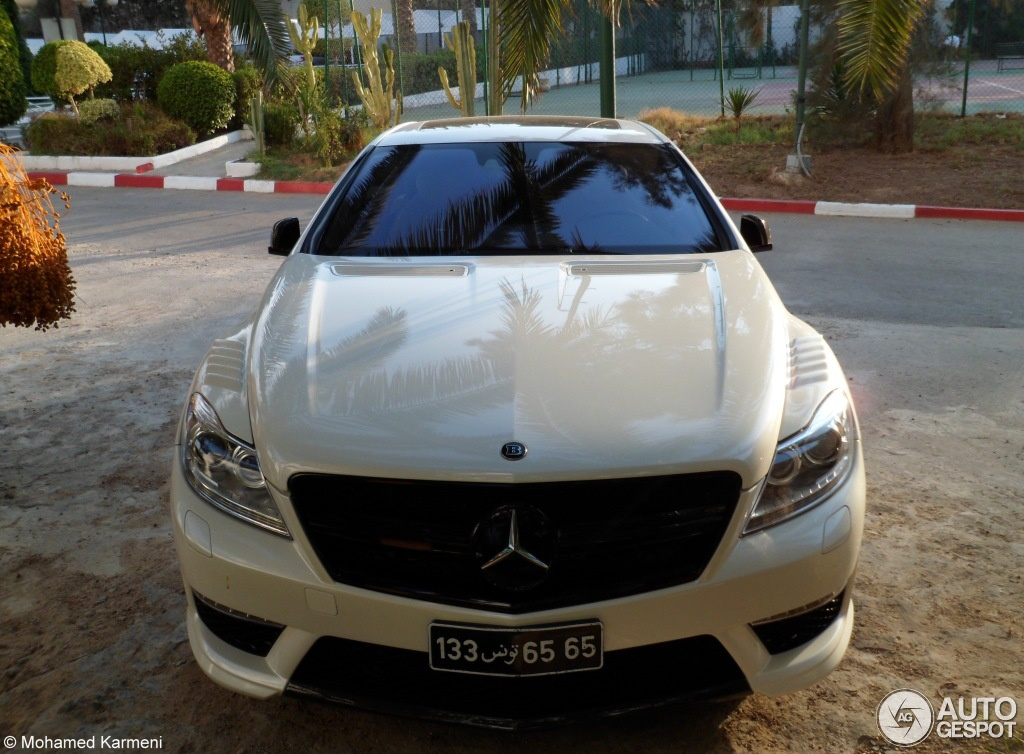

In [9]:
from google.colab.patches import cv2_imshow # cause some problem with google colab 
cv2_imshow(img) # cv.imshow('picture', img)

# Video Read, display skipped

# Height, width, no. of channels and size of an image

In [11]:
height = img.shape[0]
width = img.shape[1]
channel = img.shape[2] # A channel is the grayscale image of a coloured image,
                      # which is made up of only one of the primary colours that form the coloured image.
                      # grayschale image is single-channeled
                      # RGB images have three channels

print(height, width, channel)

dimension = img.shape
print(dimension)

754 1024 3
(754, 1024, 3)


# Resize & rescale Image

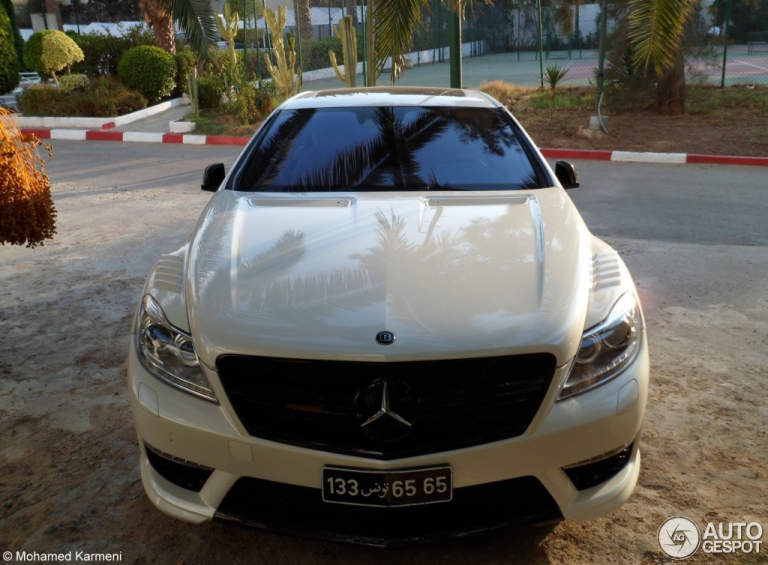

In [15]:
def rescaleframes(frame, scale=0.75):
  height = int(frame.shape[0] * scale)
  width = int(frame.shape[1] * scale)
  dimensions = (width, height)

  return cv.resize(frame, dimensions, interpolation=cv.INTER_AREA)

resized_img = rescaleframes(img)
cv2_imshow(resized_img)

# Draw Shapes & putting text on image

## creating dummpy image

Dummy image: 


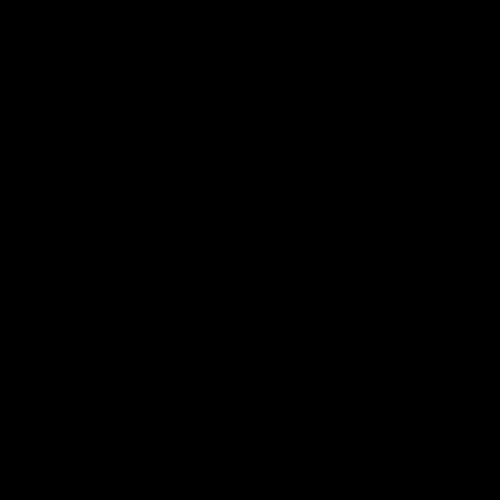

Green Color image: 


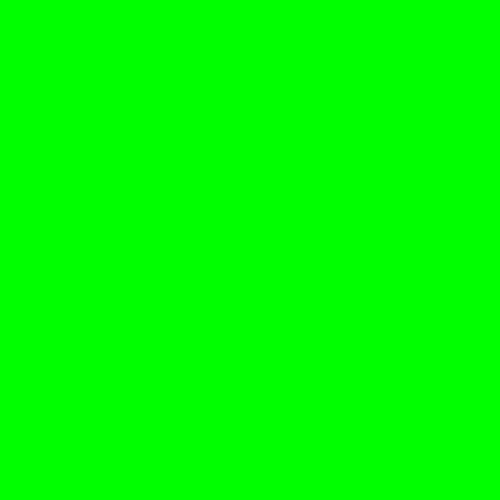

In [22]:
dummy = np.zeros((500, 500, 3), dtype='uint8')
print('Dummy image: ')
cv2_imshow(dummy)

dummy[:] = 0, 255, 0
print('Green Color image: ')
cv2_imshow(dummy)

## Color certain portion of the image

image 1:


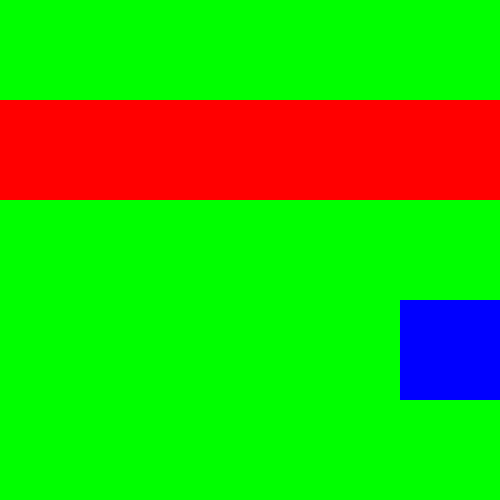

image 2:


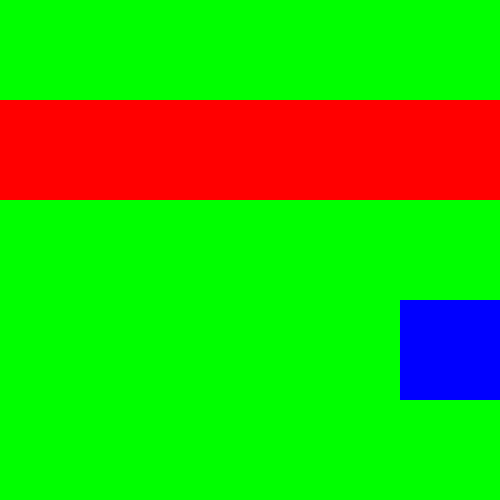

In [30]:
dummy[100:200] = 0, 0, 255
print('image 1:')
cv2_imshow(dummy)

dummy[300:400, 400: 500] = 255, 0, 0
print('image 2:')
cv2_imshow(dummy)

## Draw a rectangle

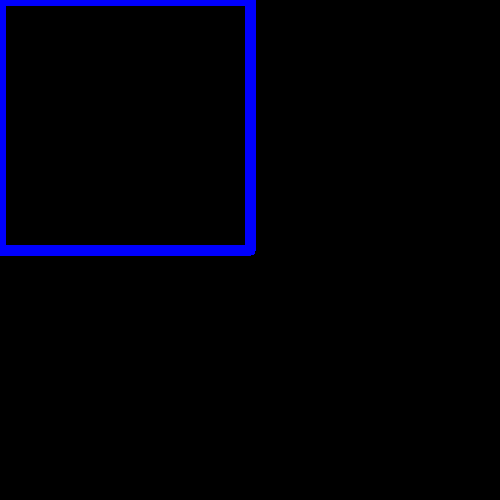

In [34]:
dummy_rec = np.zeros((500, 500, 3), dtype='uint8')
cv.rectangle(dummy_rec, (0, 0), (250, 250), (255, 0, 0), thickness=10) # thickness=cv.FILLED/thikcness=-1
cv2_imshow(dummy_rec)

## Draw a circle

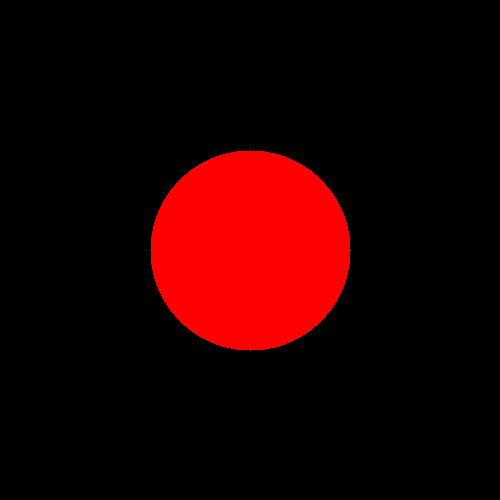

In [37]:
dummy_circ = np.zeros((500, 500, 3), dtype='uint8')
cv.circle(dummy_circ, (250, 250), 100, (0, 0, 255), thickness=-1)
cv2_imshow(dummy_circ)

## draw a line

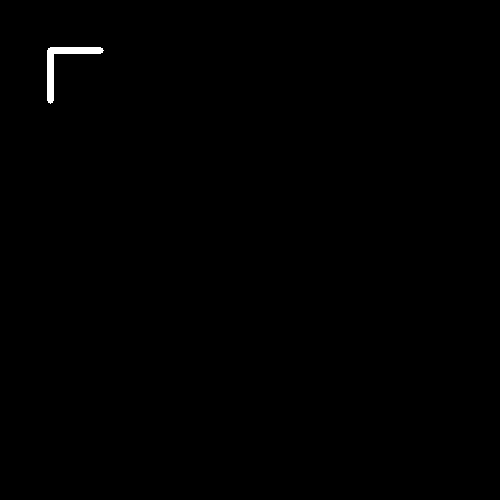

In [40]:
dummy_line = np.zeros((500, 500, 3), dtype='uint8')
cv.line(dummy_line, (50, 50), (50, 100), (255, 255, 255), thickness=5)
cv.line(dummy_line, (50, 50), (100, 50), (255, 255, 255), thickness=5)
cv2_imshow(dummy_line)

## Write text

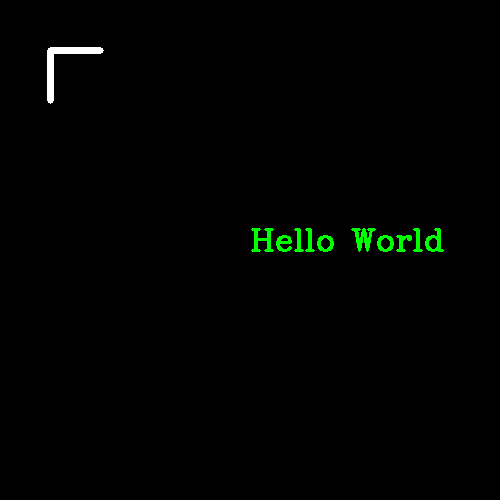

In [46]:
cv.putText(dummy_line, 'Hello World', (250, 250), cv.FONT_HERSHEY_COMPLEX, 1.0, (0, 255, 0), 2)
cv2_imshow(dummy_line)

# 5 Essential functions

## Convert to gray scale

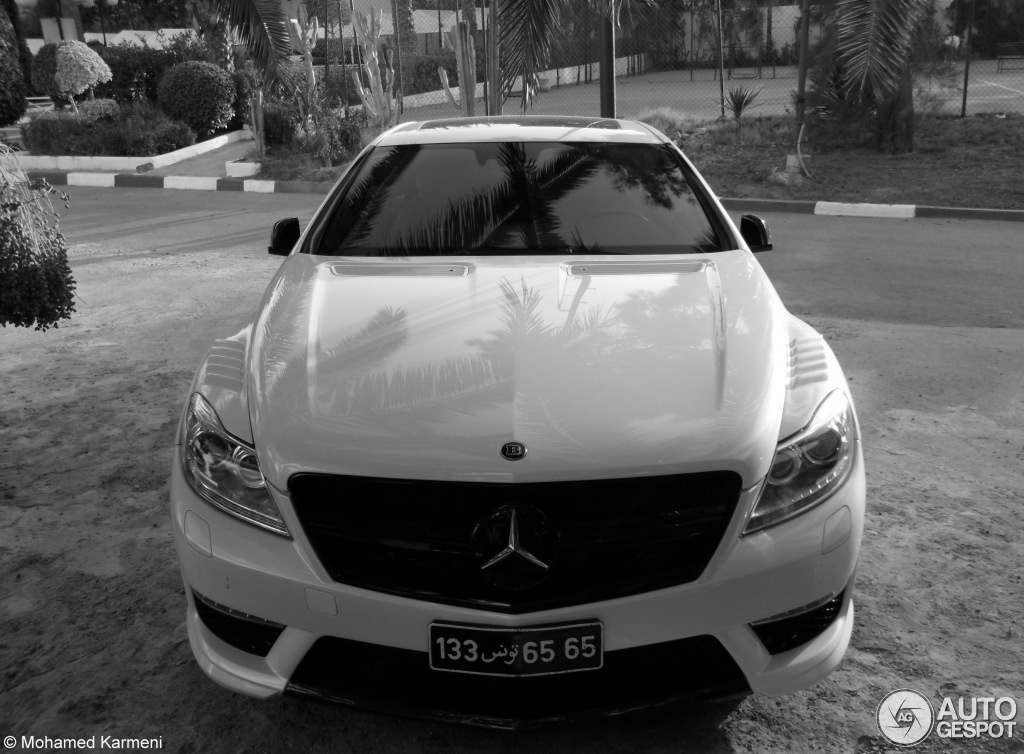

In [47]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

## Blur an image - removes some of the noise

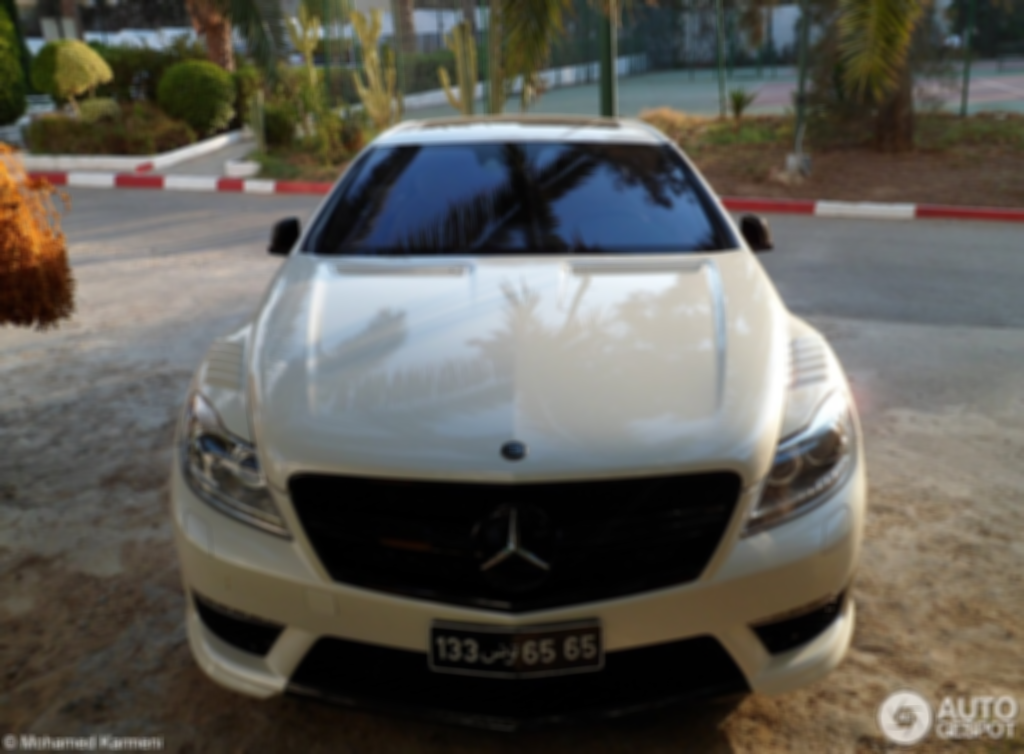

In [55]:
blur = cv.GaussianBlur(img, (7, 7), cv.BORDER_DEFAULT) # keep kernel-size (odd, odd). The greater the size, blurness increses
cv2_imshow(blur)

## Edge Cascade - Canny

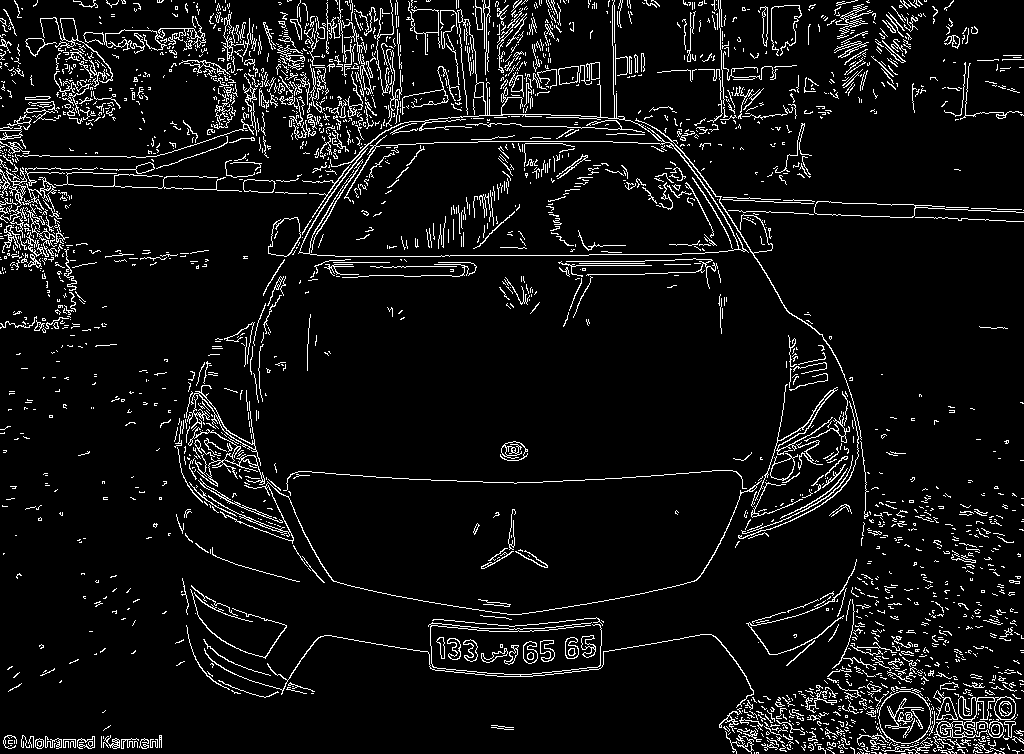

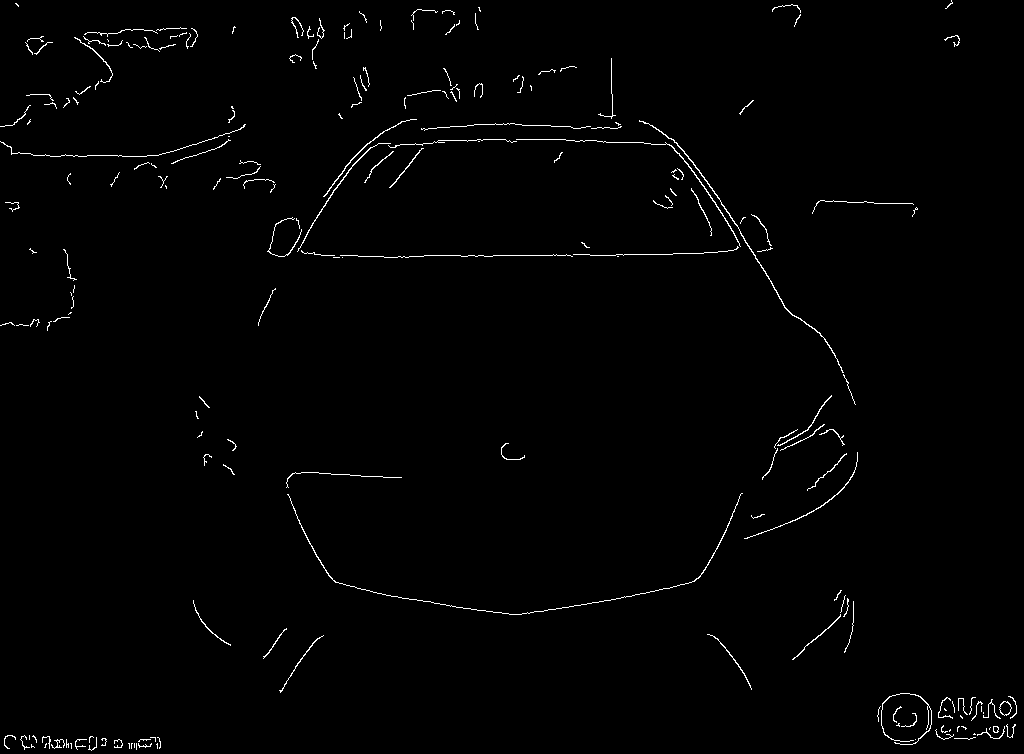

In [56]:
canny = cv.Canny(img, 125, 175)
cv2_imshow(canny)

canny_blur = cv.Canny(blur, 125, 175)
cv2_imshow(canny_blur) # decreases the amount of edges

## Dilating the image

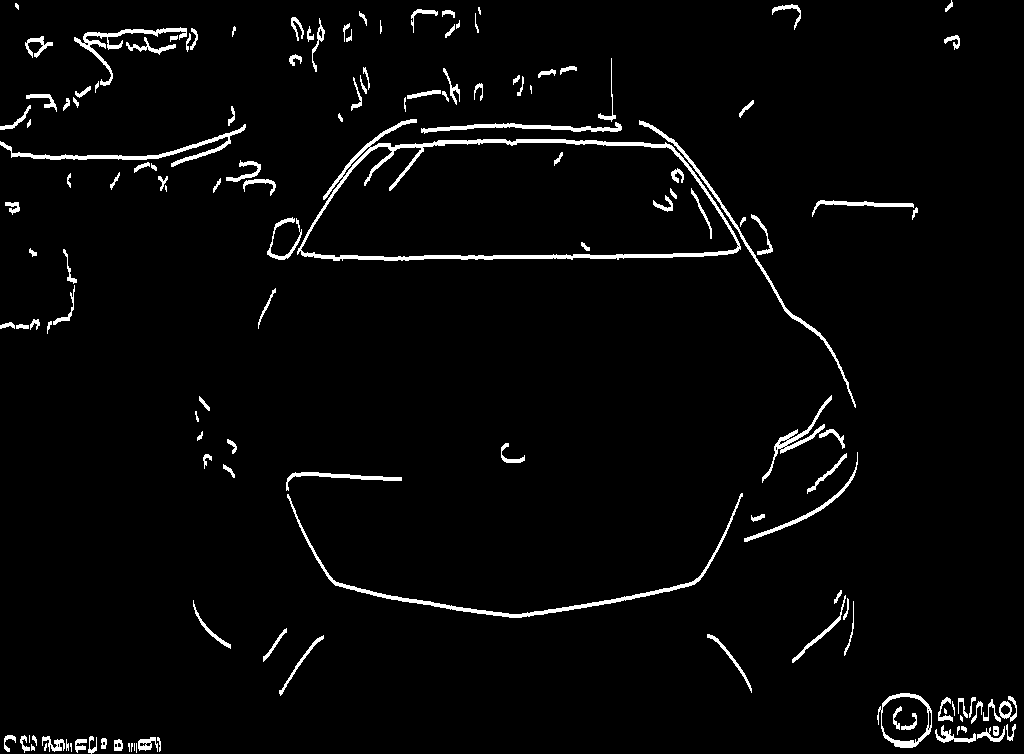

In [58]:
dilated = cv.dilate(canny_blur, (7, 7), iterations=3)
cv2_imshow(dilated)

## Eroding

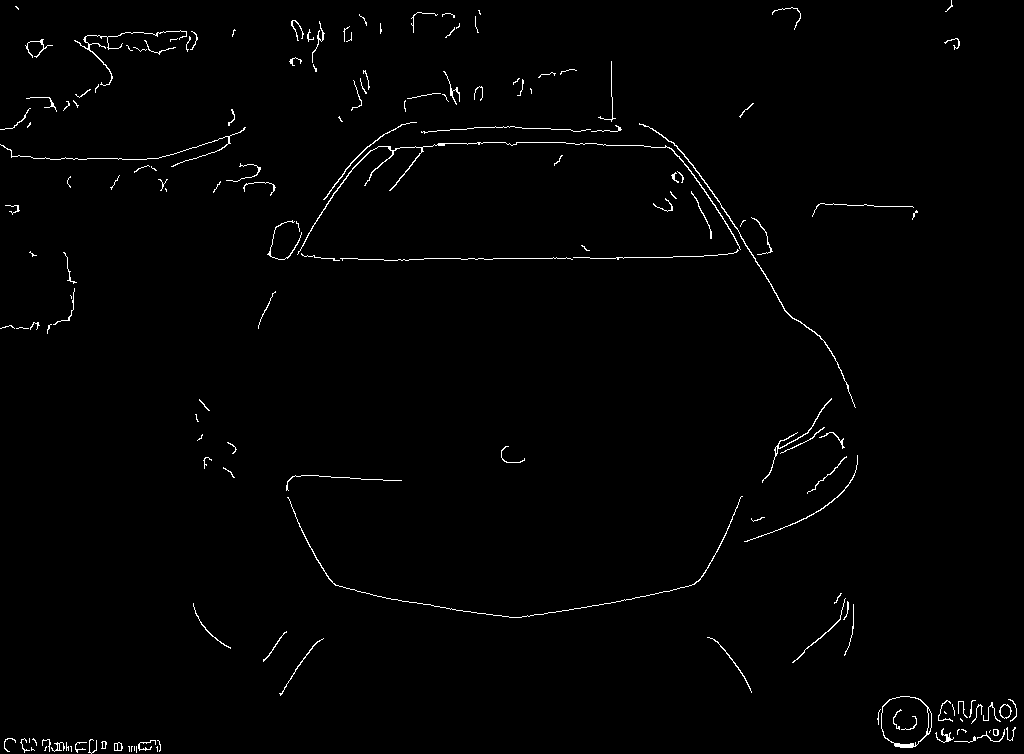

In [59]:
eroded = cv.erode(dilated, (7, 7), iterations=3)
cv2_imshow(eroded)

## Resize

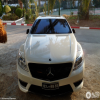

In [60]:
resized = cv.resize(img, (100, 100), interpolation=cv.INTER_AREA)
"""
cv.INTER_AREA - useful for shrinking
cv.INTER_LINEAR - useful while enlarging
cv.INTER_CUBIC - useful while enlaring with high quality in the slowest manner
"""
cv2_imshow(resized)

## Cropping - array slicing



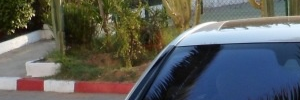

In [62]:
cropped = img[100:200, 200: 500]
cv2_imshow(cropped)

# Image transformation